# Projet 6

## Introduction

Notre mission au sein de l'entreprise "Place de marché" consiste à étudier la faisabilité d'un moteur de classification automatique d'articles pour une future marketplace e-commerce. Actuellement, l'attribution des catégories d'articles est effectuée manuellement par les vendeurs, ce qui entraîne des inefficacités. Notre objectif est d'automatiser ce processus en analysant les descriptions textuelles et les images des produits. Nous explorerons différentes approches pour extraire les caractéristiques pertinentes et démontrer la faisabilité de regrouper automatiquement des produits de même catégorie. Ce projet vise à améliorer l'expérience utilisateur pour les vendeurs et les acheteurs.

#### Importation des librairies nécessaires

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Importation du fichier à étudier

In [4]:
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [3]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Comme nous pouvons le voir nous avons bien dans ce fichier 1050 entrées et 15 colonnes.

In [5]:
# Calcul du pourcentage de valeurs manquantes par colonne
missing_percentage = data.isna().mean() * 100

# Affichage du pourcentage de valeurs manquantes par colonne
print(missing_percentage)

uniq_id                     0.000000
crawl_timestamp             0.000000
product_url                 0.000000
product_name                0.000000
product_category_tree       0.000000
pid                         0.000000
retail_price                0.095238
discounted_price            0.095238
image                       0.000000
is_FK_Advantage_product     0.000000
description                 0.000000
product_rating              0.000000
overall_rating              0.000000
brand                      32.190476
product_specifications      0.095238
dtype: float64


In [6]:
# Calcul du pourcentage de valeurs manquantes
missing_percentage = data.isna().mean().mean() * 100

# Afficher le pourcentage total de valeurs manquantes
print("Pourcentage total de valeurs manquantes :", missing_percentage)

Pourcentage total de valeurs manquantes : 2.165079365079365


On peu donc voir ici le pourcentage de valeurs manquantes et on se rends comptes que nous avons beaucoup de valeurs manquantes pour la colonne des marques. Pour la suite de notre analyse nous allons utiliser principalement la colonne description qui est effectivement la plus pertinente pour notre étude. 

### Traitement du texte :

In [5]:
# Import des bibliothèques nécessaires
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Téléchargement des ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fonction de prétraitement du texte
def preprocess_text(text):
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d+', ' ', text)
    # Convertion en minuscules
    text = text.lower()
    # Tokenisation
    tokens = nltk.word_tokenize(text)
    # Supprimer les mots vides et les mots ne contenant qu'une seule lettre
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoindre les tokens en une chaîne de caractères
    text = ' '.join(tokens)
    return text

# Appliquation de la fonction de prétraitement aux données textuelles
data['clean_text'] = data['description'].apply(preprocess_text)

# Encodage du texte avec Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['clean_text'])

# Encodage du texte avec TfIdf
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['clean_text'])

# Réduction de dimension avec TruncatedSVD (LSA)
lsa = TruncatedSVD(n_components=2)
X_lsa = lsa.fit_transform(X_tfidf)

# Affichage des résultats
print("Bag of Words encoded text shape:", X_bow.shape)
print("TfIdf encoded text shape:", X_tfidf.shape)
print("LSA reduced text shape:", X_lsa.shape)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Bag of Words encoded text shape: (1050, 4082)
TfIdf encoded text shape: (1050, 4082)
LSA reduced text shape: (1050, 2)


En effet ce code prépare les données textuelles pour une analyse ultérieure en les nettoyant, les encodant et en réduisant leur dimensionnalité pour une éventuelle visualisation ou modélisation.

#### Visualisation des résultats

In [6]:
# Affichage de quelques exemples de données brutes
print("Exemples de données brutes :")
for i in range(5):
    print(data['description'].iloc[i])
    print()

# Appliquer le prétraitement aux données
preprocessed_data = data['description'].apply(preprocess_text)

# Affichage des exemples de données prétraitées
print("\nExemples de données prétraitées :")
for i in range(5):
    print(preprocessed_data.iloc[i])
    print()

Exemples de données brutes :
Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters li

Il semble que le traitement ai bien fonctionné nous pouvons poursuivre :

In [7]:
# Création d'une liste vide pour stocker tous les mots prétraités
all_words = []

# ON parcours chaque texte prétraité et le divise en mots
for text in data['clean_text']:
    words = text.split()
    all_words.extend(words)

# Convertion de la liste de mots en un ensemble pour obtenir les mots uniques
unique_words = set(all_words)

# Affichage des mots uniques
print(unique_words)

{'demo', 'parti', 'hijri', 'exterior', 'bd', 'extern', 'unruli', 'mother', 'pyjamaset', 'pari', 'rishan', 'india', 'soda', 'cpgi', '_b', 'solid', 'jewelleri', 'dupion', 'apex', 'handi', 'sober', 'svayam', 'prisha', 'job', 'purchas', 'green_cactus_', 'avi', 'potteri', 'stroll', 'medium', 'greedi', 'prishaindia', 'bristl', 'lbp', 'apollo', 'clock', 'raja', 'restaur', 'divin', 'hood', 'propyl', 'tenda', 'ducjug', 'tackl', 'teflon', 'mundan', 'chota', 'wood', 'curio', 'fibr', 'movi', 'spinz', 'though', 'belong', 'mission', 'wna', 'first', 'calib', 'upset', 'understood', 'celsiu', 'understand', 'stroller', 'sd', 'plug', 'mishandl', 'btp_yx', 'supercrit', 'jewel', 'spend', 'sinus', 'locat', 'die', 'pud', 'flat', 'abl', 'embroideri', 'homec', 'anytim', 'slide', 'wring', 'uniform', 'buddha', 'keyston', 'vari', 'shanker', 'renown', 'detail', 'replic', 'effect', 'spandex', 'polyresin', 'grass', 'tritan', 'bornbabykid', 'welcom', 'neckerchew', 'author', 'whiteherb', 'access', 'hurt', 'rmcc', 'ech

In [8]:
from collections import Counter

# Comptage des occurrences de chaque mot
word_counts = Counter(all_words)

# Affichage des 10 mots les plus présents
print("Les 10 mots les plus présents :")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count} fois")

# Affichage des 10 mots les moins présents
print("\nLes 10 mots les moins présents :")
for word, count in word_counts.most_common()[:-11:-1]:
    print(f"{word}: {count} fois")


Les 10 mots les plus présents :
r: 911 fois
product: 870 fois
free: 618 fois
cm: 595 fois
buy: 581 fois
replac: 570 fois
ship: 569 fois
deliveri: 567 fois
genuin: 564 fois
cash: 564 fois

Les 10 mots les moins présents :
oren: 1 fois
deeper: 1 fois
intent: 1 fois
clockwis: 1 fois
rotat: 1 fois
main: 1 fois
aura: 1 fois
vastu: 1 fois
apron: 1 fois
clinic: 1 fois


On se rends comptes que r est un des mots les plus présents nous allons voir par la suite ce que nous allons faire.

### Visualisation des donées à l'aide de TSNE:

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


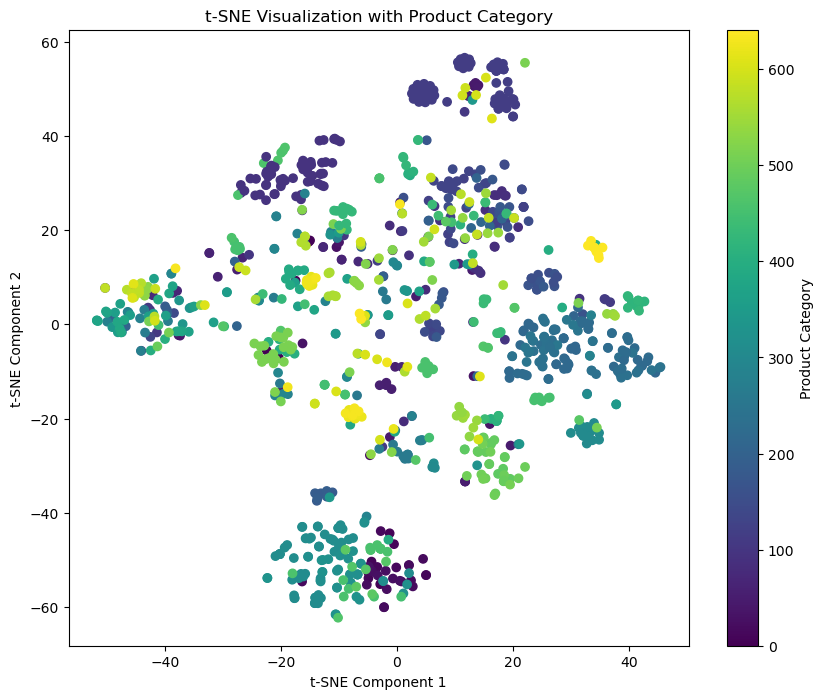

In [9]:
from sklearn.manifold import TSNE

# Création du modèle t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Création du graphique t-SNE en colorant les points en fonction de la catégorie de produit
plt.figure(figsize=(10, 8))
categories = data['product_category_tree']  # Récupération des catégories de produit
unique_categories = categories.unique()  # Catégories uniques

# Création d'un dictionnaire pour mapper chaque catégorie à une couleur unique
category_color_map = {category: idx for idx, category in enumerate(unique_categories)}

# Coloration des points en fonction de la catégorie de produit
colors = [category_color_map[category] for category in categories]

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis')
plt.colorbar(label='Product Category')
plt.title('t-SNE Visualization with Product Category')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Je veux maintenant entraîner un modèle Word2Vec sur des données textuelles prétraitées, et utiliser ce modèle pour obtenir des vecteurs de mots et par conséquent rechercher des mots similaires dans l'espace vectoriel des mots.

In [10]:
from gensim.models import Word2Vec

# Convertir les données prétraitées en une liste de listes de mots
tokenized_text = [text.split() for text in data['clean_text']]

# Entraîner le modèle Word2Vec
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Utiliser le modèle pour obtenir des vecteurs de mots
vector = model.wv['word']

# Rechercher des mots similaires
similar_words = model.wv.most_similar('word', topn=10)
print(similar_words)

[('deliveri', 0.6288545727729797), ('cash', 0.6205800175666809), ('best', 0.619579017162323), ('replac', 0.6186385750770569), ('ship', 0.6151576638221741), ('free', 0.6145763993263245), ('guarante', 0.6139270663261414), ('sent', 0.608227550983429), ('day', 0.6073412299156189), ('product', 0.6039714217185974)]


#### Création du texte pour l'utilisation de réseau de neuronnes :

In [50]:
import re
import pandas as pd
import tensorflow_hub as hub

# Chargement du modèle Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Fonction pour nettoyer le texte en enlevant la ponctuation et en le mettant en minuscules
def clean_text(text):
    text = text.lower()  # Convertion en minuscules
    text = re.sub(r'[^\w\s]', '', text)  # Suppression de la ponctuation
    return text

# Chargement des données
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

# On applique le nettoyage du texte uniquement à la colonne "description"
data['clean_text_rn'] = data['description'].apply(clean_text)

# On applique le modèle Universal Sentence Encoder aux données textuelles
use_embeddings = use_model(data['clean_text_rn'])

print(use_embeddings.shape)

(1050, 512)


### Word2Vec

In [52]:
from gensim.models import Word2Vec

# Préparation des données pour l'entraînement
sentences = [doc.split() for doc in data['clean_text_rn']]

# Entraînement du modèle Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

word2vec_embeddings = []
for doc in data['clean_text_rn']:
    words = [word for word in doc.split() if word in word2vec_model.wv]
    doc_embedding = np.mean([word2vec_model.wv[word] for word in words], axis=0)
    word2vec_embeddings.append(doc_embedding)

word2vec_embeddings = np.array(word2vec_embeddings)
word2vec_embeddings

array([[-0.01516175,  0.38933107,  0.19182174, ..., -0.5306266 ,
         0.5170817 , -0.44718194],
       [-0.24566898,  0.27185982,  0.10988131, ..., -0.57889146,
         0.4962907 , -0.72227347],
       [-0.04269674,  0.3767584 ,  0.18577257, ..., -0.48892143,
         0.44039032, -0.48707342],
       ...,
       [ 0.22890136,  0.8988037 ,  0.17899708, ..., -0.21743838,
         0.2743071 ,  0.01661492],
       [ 0.27430165,  1.1026909 ,  0.22192924, ..., -0.28287798,
         0.3529546 ,  0.00335488],
       [ 0.29676327,  1.1437799 ,  0.22554164, ..., -0.27018145,
         0.34721786,  0.03078551]], dtype=float32)

Il semble que cela ai bien fonctionné nous allons pouvoir passer à la suite: 

On applique kmeans et on cherches à visualiser les regroupements des différents clusters:

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


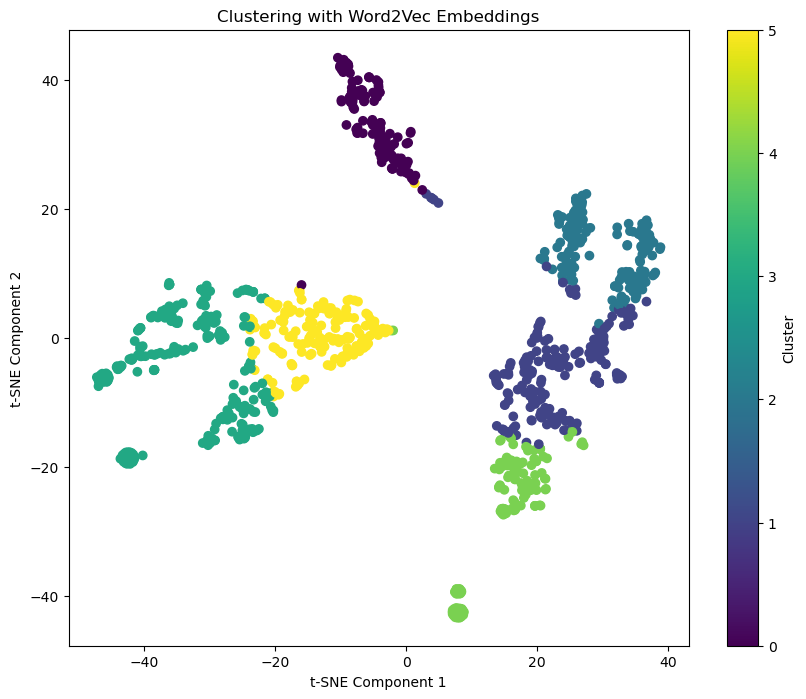

Silhouette Score: 0.39780053


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mise en place de K-means pour regrouper les embeddings
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(word2vec_embeddings)

# Réduction des embeddings en 2 dimensions pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(word2vec_embeddings)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Clustering with Word2Vec Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Évaluation de la qualité des clusters avec l'indice de silhouette
silhouette_avg_W2V = silhouette_score(word2vec_embeddings, clusters)
print("Silhouette Score:", silhouette_avg_W2V)

On obtient un score de silhouette de 0.397 ce qui est relativement correct cependant visuellement ce n'est pas très représentatif.

In [7]:
#Vérification : 
num_categories = data['product_category_tree'].nunique()
print("Nombre de catégories réelles:", num_categories)

Nombre de catégories réelles: 642


Comme nous pouvons nous en rendre compte nous avons beaucoup trop de catégories réelles nous devons donc faire un tri.

#### Définition de la fonction pour extraire les catégories principales

In [89]:
def extract_main_category(category_tree):
    return category_tree.split('>>')[0].strip()

In [91]:
# Afficher les catégories principales uniques
print(data['main_category'].unique())

['["Home Furnishing' '["Baby Care' '["Watches'
 '["Home Decor & Festive Needs' '["Kitchen & Dining'
 '["Beauty and Personal Care' '["Computers']


On observe donc ici les catégories principales que nous allons utiliser pour la suite des tests.

In [100]:
# Ajout d'une nouvelle colonne pour les catégories principales
data['main_category'] = data['product_category_tree'].apply(extract_main_category)

# Mise en place de K-means pour regrouper les embeddings word2vec
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(word2vec_embeddings)

# Étiquetage des clusters
data['predicted_category'] = clusters

# Comparaison des étiquettes des clusters avec les catégories principales
cluster_categories = data.groupby('predicted_category')['main_category'].apply(lambda x: x.value_counts().index[0])
cluster_labels = cluster_categories[clusters]
real_labels = data['main_category']

# Réinitialisation les index pour aligner les deux séries
cluster_labels = cluster_labels.reset_index(drop=True)
real_labels = real_labels.reset_index(drop=True)

# Calcul de la similarité
similarity_score_W2V = sum(cluster_labels == real_labels) / len(real_labels)
print("Similarity Score:", similarity_score_W2V)

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Similarity Score: 0.4066666666666667


On obtient un similarity score de 0.406 ce qui est correct, mais nous allons pouvoir tester d'autres techniques pour trouver la plus adapté à notre jeux de donné.

Je décide ici de regarder les similarités en fonction des mots pour tester notre jeux de donné.

In [81]:
# Visualisation des similirarités 
test = word2vec_model.wv.similar_by_word('cash')
print(test)

[('shipping', 0.9995000958442688), ('delivery', 0.9991165399551392), ('free', 0.998801589012146), ('guarantee', 0.9955471754074097), ('products', 0.9947407245635986), ('replacement', 0.9947102665901184), ('30', 0.9945733547210693), ('on', 0.9915390610694885), ('day', 0.9905077219009399), ('genuine', 0.9894883632659912)]


Cela me semble assez pertinent en effet.

### BERT

In [22]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [54]:
from transformers import BertTokenizer, BertModel
import torch

# Chargement du tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Chargement du modèle BERT
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Fonction pour obtenir les embeddings BERT d'un document
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

# Application de la fonction aux données textuelles
bert_embeddings = []
for doc in data['clean_text_rn']:
    embeddings = get_bert_embeddings(doc)
    bert_embeddings.append(embeddings)

bert_embeddings = np.array(bert_embeddings)
print(bert_embeddings.shape)

(1050, 768)


C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


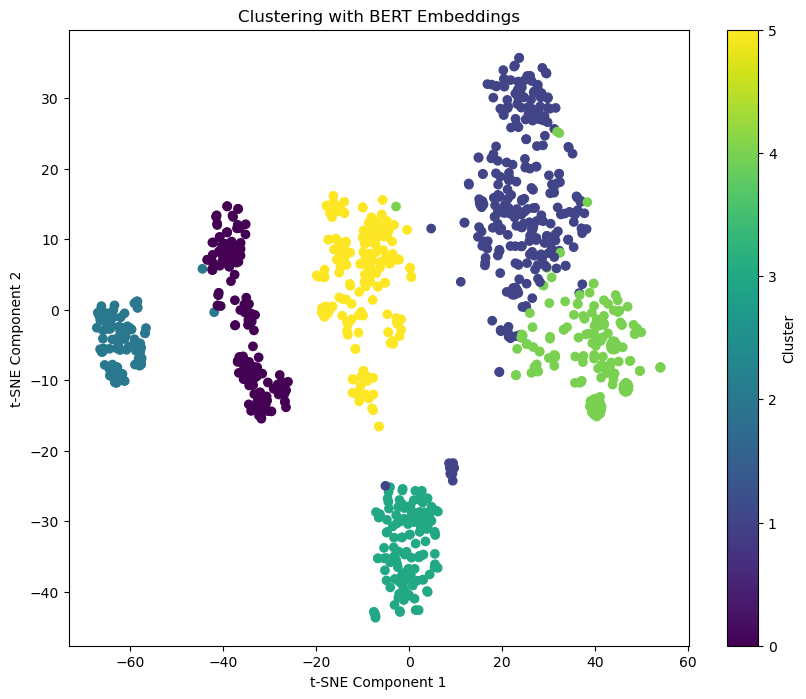

Silhouette Score: 0.15042359


In [70]:
# Mise en place de K-means pour regrouper les embeddings BERT
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(bert_embeddings)

# Réduction des embeddings en 2 dimensions pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(bert_embeddings)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Clustering with BERT Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Évaluation de la qualité des clusters avec l'indice de silhouette
silhouette_avg_bert = silhouette_score(bert_embeddings, clusters)
print("Silhouette Score:", silhouette_avg_bert)

Comme nous pouvons le voir le score silhoouette est dans ce cas beaucoup plus faible que avec Word2Vec cependant graphiquement la répartition semble beaucoup plus claire et logique.

In [99]:
import pandas as pd
from sklearn.cluster import KMeans

# On défini la fonction pour extraire la catégorie principale
def extract_main_category(category_tree):
    return category_tree.split('>>')[0].strip()

# On applique la fonction pour extraire la catégorie principale
data['main_category'] = data['product_category_tree'].apply(extract_main_category)

# On applique K-means pour regrouper les embeddings BERT
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(bert_embeddings)

# Étiquetage des clusters
data['predicted_category'] = clusters

# Comparaison des étiquettes des clusters avec les catégories réelles
cluster_categories = data.groupby('predicted_category')['main_category'].apply(lambda x: x.value_counts().index[0])
cluster_labels = cluster_categories[clusters]
real_labels = data['main_category']

# Réinitialisation des index pour aligner les deux séries
cluster_labels = cluster_labels.reset_index(drop=True)
real_labels = real_labels.reset_index(drop=True)

# Calcul de la similarité
similarity_score_bert = sum(cluster_labels == real_labels) / len(real_labels)
print("Similarity Score for BERT:", similarity_score_bert)

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Similarity Score for BERT: 0.54


Cependant on obtient un score de similarité plus intéresant encore.

### Universal Sentence Encoder (USE)

In [31]:
!pip install tensorflow_hub

In [56]:
import tensorflow_hub as hub
import os

# Téléchargement du modèle Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# On applique le modèle Universal Sentence Encoder à nos données
use_embeddings = use_model(data['clean_text_rn'])

print(use_embeddings.shape)

(1050, 512)


C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


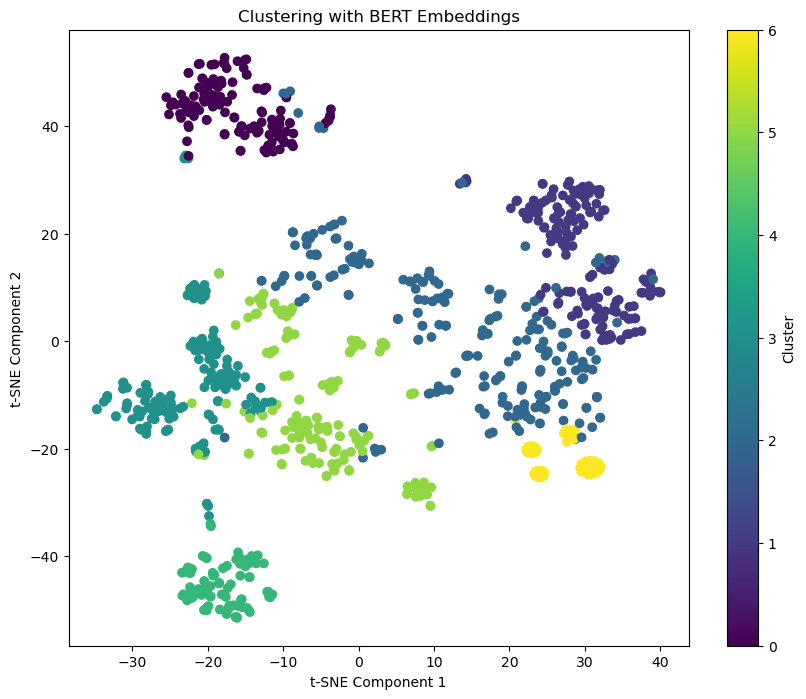

Silhouette Score: 0.10046872


In [98]:
# On applique K-means pour regrouper les embeddings BERT
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(use_embeddings)

# Réduction des embeddings en 2 dimensions pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(use_embeddings)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Clustering with USE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Évaluation de la qualité des clusters avec l'indice de silhouette
silhouette_avg_use = silhouette_score(use_embeddings, clusters)
print("Silhouette Score:", silhouette_avg_use)

Ici le score est le plus faible des trois techniques, comme on peut le voir les clusters se superposent.

In [105]:
import pandas as pd
from sklearn.cluster import KMeans

# Chargement des données
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

# On définis la fonction pour extraire la catégorie principale
def extract_main_category(category_tree):
    return category_tree.split('>>')[0].strip()

# On applique la fonction pour extraire la catégorie principale
data['main_category'] = data['product_category_tree'].apply(extract_main_category)

# On applique K-means pour regrouper les embeddings USE
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(use_embeddings)

# Étiquetage des clusters
data['predicted_category'] = clusters

# Comparaison des étiquettes des clusters avec les catégories réelles
cluster_categories = data.groupby('predicted_category')['main_category'].apply(lambda x: x.value_counts().index[0])
cluster_labels = cluster_categories[clusters]
real_labels = data['main_category']

# On rénitialise les index pour aligner les deux séries
cluster_labels = cluster_labels.reset_index(drop=True)
real_labels = real_labels.reset_index(drop=True)

# Calcul de la similarité
similarity_score_USE = sum(cluster_labels == real_labels) / len(real_labels)
print("Similarity Score for USE:", similarity_score_USE)

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Similarity Score for USE: 0.5638095238095238


C'est cependant poiur le score de similarité le meilleur score que l'on ai pu obtenir.

#### Création du DataFrame de comparaison 

In [104]:
# Création du DataFrame de comparaison 
data1 = {
    'Method': ['Word2Vec', 'BERT', 'USE'],
    'Silhouette Score': [silhouette_avg_W2V, silhouette_avg_bert, silhouette_avg_use],
    'Similarity Score': [similarity_score_W2V, similarity_score_bert, similarity_score_USE]
}

silhouette_scores_df = pd.DataFrame(data1)

# Affichage du DataFrame
silhouette_scores_df

,Method,Silhouette Score,Similarity Score
0,Word2Vec,0.397801,0.406667
1,BERT,0.150424,0.540000
2,USE,0.100469,0.563810


Globalement, il semble que BERT et USE obtiennent de meilleurs résultats en termes de similarité avec les catégories réelles, tandis que Word2Vec obtient un score de silhouette légèrement plus élevé, ce qui suggère une meilleure compacité des clusters.

La meilleure méthode selon moi est BERT car visuellement c'est celui qui nous permet de mieux voir la distinction entre les différents cluster il semblerait en effet que ce soit le plus pertinant pour nous.

Comme nous avons pu le voir avec toutes ces démonstrations, il semblerait en effet que classifier automatiquement des biens de consommations est faisable et notamment avec des méthodes de réseaux de neuronnes plus ou moins pertinentes commme BERT par exemple.

# Partie sur les images: 

#### Importation du fichier à étudier

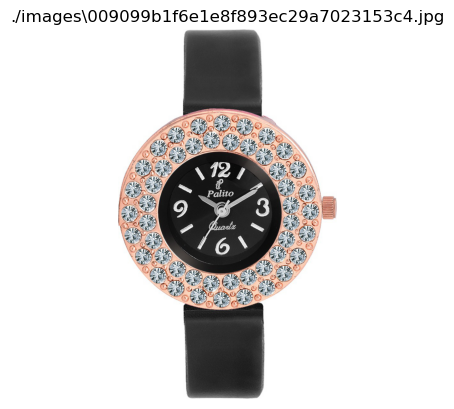

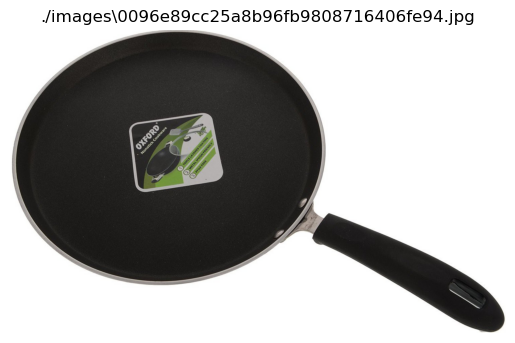

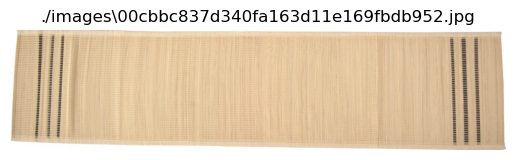

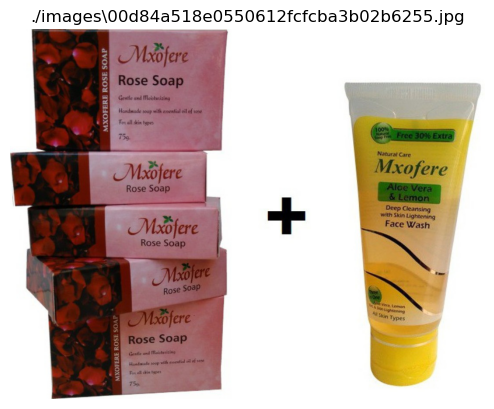

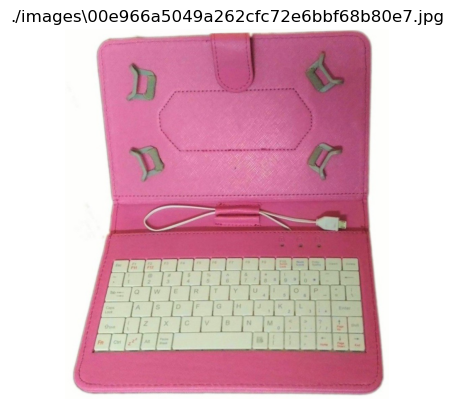

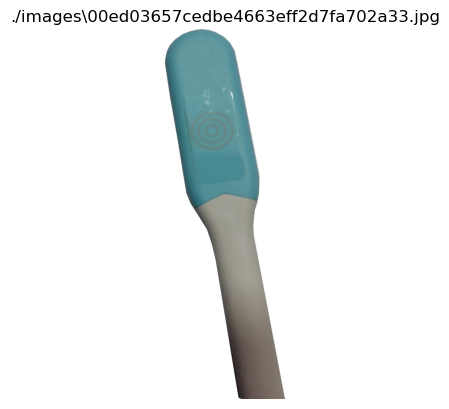

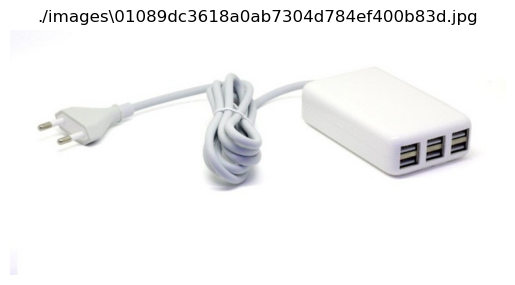

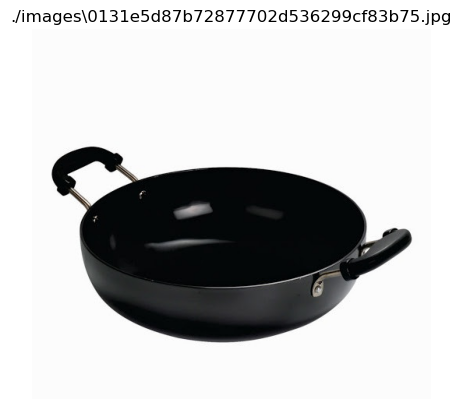

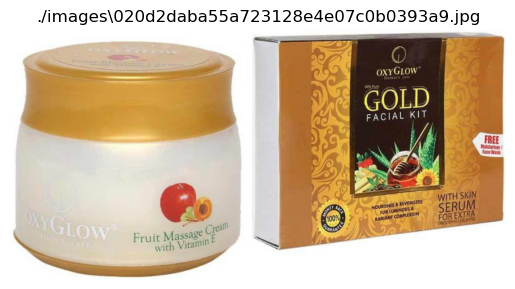

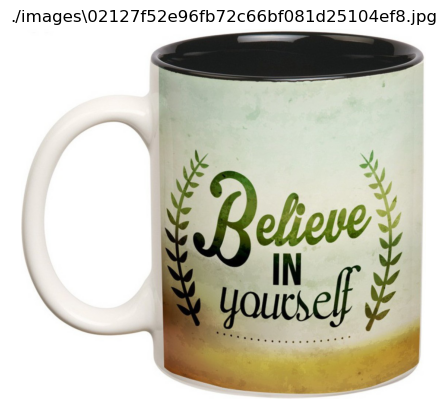

In [106]:
import os
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant vos images
chemin_dossier_images = "./images"

# Liste de fichiers dans le dossier images
fichiers_images = os.listdir(chemin_dossier_images)

# Affichage des 10 premières images
for i in range(10):
    if i < len(fichiers_images):
        image_path = os.path.join(chemin_dossier_images, fichiers_images[i])
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(image_path)
        plt.axis('off')
        plt.show()
    else:
        break

In [107]:
nombre_images = len(fichiers_images)
print("Nombre total d'images:", nombre_images)

Nombre total d'images: 1050


Nous avons bien 1050 images nous pouvons commencer notre analyse.

#### Analyse des images via différentes méthodes de transformation :

Conversion en niveau de gris :

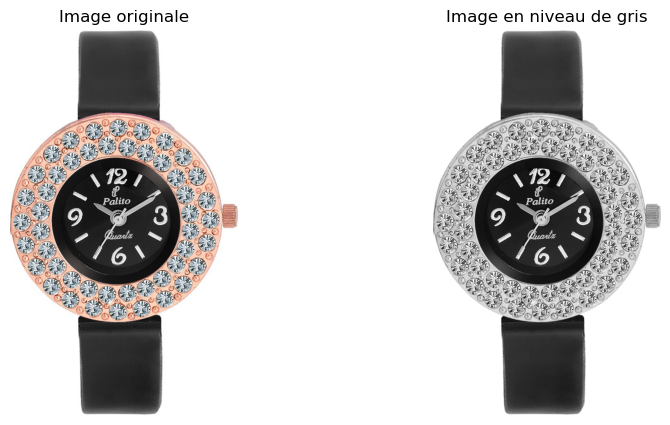

In [108]:
import cv2

# Chargement d'une image (la première image dans le dossier)
image_path = os.path.join(chemin_dossier_images, fichiers_images[0])
image = cv2.imread(image_path)

# Convertion en niveau de gris
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Affichage de l'image originale et l'image en niveau de gris
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_grayscale, cmap='gray')
plt.title('Image en niveau de gris')
plt.axis('off')
plt.show()

Le traitement a bien fonctionné.

Filtrage du bruit:

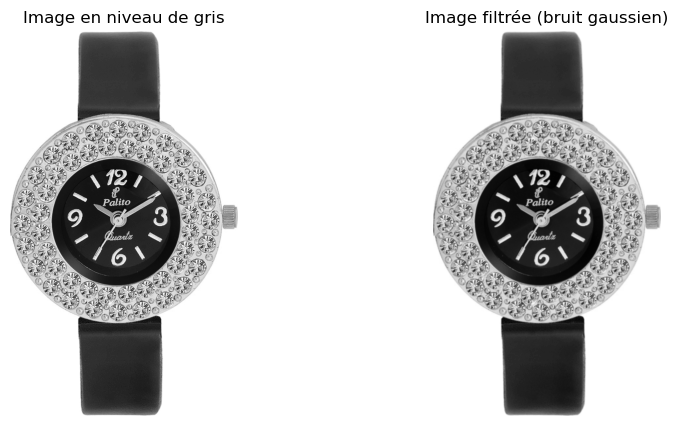

In [109]:
# Suppression du bruit gaussien
image_filtree = cv2.GaussianBlur(image_grayscale, (5, 5), 0)

# Affichage de l'image originale et de l'image filtrée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_grayscale, cmap='gray')
plt.title('Image en niveau de gris')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_filtree, cmap='gray')
plt.title('Image filtrée (bruit gaussien)')
plt.axis('off')
plt.show()

Ajustement du contraste: 

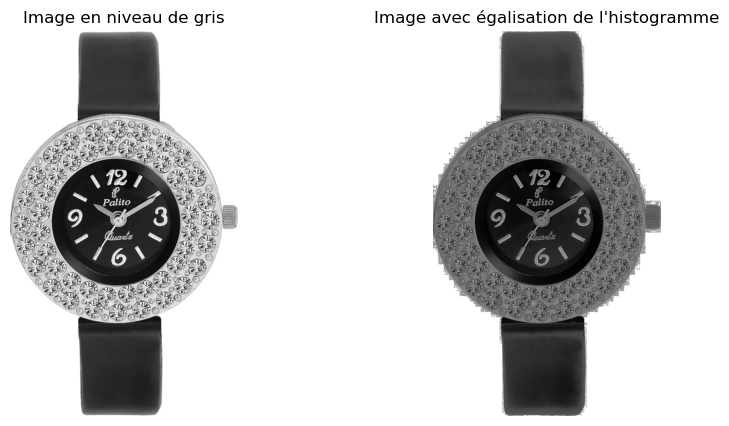

In [110]:
# Égalisation de l'histogramme
image_egale = cv2.equalizeHist(image_grayscale)

# Affichage de l'image originale et de l'image avec égalisation de l'histogramme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_grayscale, cmap='gray')
plt.title('Image en niveau de gris')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_egale, cmap='gray')
plt.title('Image avec égalisation de l\'histogramme')
plt.axis('off')
plt.show()

#### Maintenant l'ojectif est de faire de même mais pour toutes les images :

In [167]:
# Création d'une liste pour stocker les images transformées
images_transformees = []

# On parcour toutes les images dans le dossier
for nom_image in fichiers_images:
    # Chargement de l'image
    image_path = os.path.join(chemin_dossier_images, nom_image)
    image = cv2.imread(image_path)
    
    # Conversion en niveau de gris
    image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Filtrage du bruit 
    image_filtree = cv2.GaussianBlur(image_grayscale, (5, 5), 0)
    
    # Égalisation de l'histogramme pour ajustement du contraste
    image_egale = cv2.equalizeHist(image_grayscale)
    
    # Ajout de l'image transformée à la liste
    images_transformees.append((image, image_grayscale, image_filtree, image_egale))

# Vérification du nombre total d'images transformées
nombre_images_transformees = len(images_transformees)
print("Nombre total d'images transformées:", nombre_images_transformees)

Nombre total d'images transformées: 1050


## Etude de faisabilité :

#### Algorithmes d'extraction de features d’images

Utilisation de ORB (Oriented FAST and Rotated BRIEF)

In [154]:
# Création  d'un détecteur ORB
orb = cv2.ORB_create()

# Liste pour stocker les caractéristiques des images
features = []

# Parcourir les images dans le dossier
for nom_image in fichiers_images:
    # Chargement de l'image
    image_path = os.path.join(chemin_dossier_images, nom_image)
    image = cv2.imread(image_path)
    
    # Convertion de l'image en niveaux de gris
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Obtention des points clés et descripteurs avec ORB
    keypoints, descriptors = orb.detectAndCompute(image_gray, None)
        # Srockage des points clés et descripteurs dans la liste des caractéristiques
    features.append((keypoints, descriptors))

# Affichage des caractéristiques de la première image
print("Nombre de points clés trouvés dans la première image:", len(features[0][0]))
print("Descripteurs de la première image:", features[0][1])

Nombre de points clés trouvés dans la première image: 500
Descripteurs de la première image: [[206  28 163 ...  93  85 114]
 [179  73  67 ... 187 114 172]
 [105  72  75 ... 186  88 168]
 ...
 [248 161 172 ...  12  86  66]
 [ 80 161  58 ...   2 167  10]
 [ 68 115  88 ... 162   7  17]]


Cela a bien fonctioné nous pouvons passer à la suite.

In [113]:
# Vérification du nombre total d'éléments dans la liste des caractéristiques
total_images_processed = len(features)

# Comparaison avec le nombre total d'images dans le dossier
if total_images_processed == len(fichiers_images):
    print("Toutes les images ont été traitées avec succès.")
    print("Nombre total d'images traitées:", total_images_processed)
else:
    print("Attention : certaines images n'ont pas été traitées.")
    print("Nombre total d'images traitées:", total_images_processed)
    print("Nombre total d'images dans le dossier:", len(fichiers_images))

Toutes les images ont été traitées avec succès.
Nombre total d'images traitées: 1050


In [114]:
# Initialisation du compteur pour le nombre d'images avec des descripteurs extraits
images_with_descriptors = 0

# Parcourir les caractéristiques extraites
for keypoints, descriptors in features:
    # Vérification si des descripteurs ont été extraits pour cette image
    if descriptors is not None:
        images_with_descriptors += 1

# Comparaison avec le nombre total d'images
if images_with_descriptors == len(features):
    print("Toutes les images ont des descripteurs extraits.")
    print("Nombre total d'images avec des descripteurs extraits:", images_with_descriptors)
else:
    print("Attention : certaines images n'ont pas de descripteurs extraits.")
    print("Nombre total d'images avec des descripteurs extraits:", images_with_descriptors)
    print("Nombre total d'images dans le dossier:", len(features))

Attention : certaines images n'ont pas de descripteurs extraits.
Nombre total d'images avec des descripteurs extraits: 1049
Nombre total d'images dans le dossier: 1050


On peut observer qu'il y a une image qui n'est pas décrite nous allons donc essayer de comprendre mieux: 

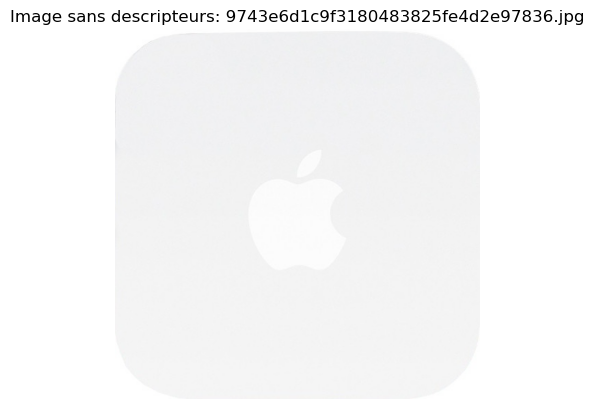

In [115]:
index_first_image_without_descriptors = next(i for i, (_, descriptors) in enumerate(features) if descriptors is None)

# Affichage de l'image correspondante
image_path = os.path.join(chemin_dossier_images, fichiers_images[index_first_image_without_descriptors])
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Image sans descripteurs: {fichiers_images[index_first_image_without_descriptors]}")
plt.axis('off')
plt.show()

On peu ici observer l'image qui n'est pas décrite. Je décide de finalement la supprimer pour éviter tous problème car elle n'est pas forcément nécessaire à notre étude.

In [116]:
### Vérification

# Liste pour stocker les caractéristiques des images avec des descripteurs
features_with_descriptors = []

# Parcourir les caractéristiques extraites
for keypoints, descriptors in features:
    # Vérification si des descripteurs ont été extraits pour cette image
    if descriptors is not None:
        features_with_descriptors.append((keypoints, descriptors))

# Affichage du nombre total d'images avec des descripteurs extraits
print("Nombre total d'images avec des descripteurs extraits:", len(features_with_descriptors))

# On recrée la liste des fichiers images en ne conservant que ceux avec des descripteurs
fichiers_images_avec_descripteurs = [fichiers_images[i] for i in range(len(features)) if features[i][1] is not None]

# Affichage du nombre total de fichiers d'images conservés
print("Nombre total de fichiers d'images conservés:", len(fichiers_images_avec_descripteurs))

Nombre total d'images avec des descripteurs extraits: 1049
Nombre total de fichiers d'images conservés: 1049


#### Méthodes de réduction de dimension sur les images encodées

In [117]:
# Je décide de regarder ce que ca me donnerais si je faisait une ACP sur les catégories

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Convertir les descripteurs en une seule liste pour l'entrée du PCA et TSNE
descriptors_list = [descriptor for _, descriptors in features_with_descriptors for descriptor in descriptors]

# Appliquer PCA pour réduire la dimension
pca = PCA(n_components=0.80)
feat_pca = pca.fit_transform(descriptors_list)

print("Nombre de composantes principales conservées par PCA:", pca.n_components_)

Nombre de composantes principales conservées par PCA: 18


#### Je préfère finalement garder ma méthode précédente et garder mes 7 catégories : 

In [118]:
# Charger les données
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

# Extraire la catégorie principale pour chaque produit
data['main_category'] = data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Afficher les catégories principales uniques
print(data['main_category'].unique())

['["Home Furnishing' '["Baby Care' '["Watches'
 '["Home Decor & Festive Needs' '["Kitchen & Dining'
 '["Beauty and Personal Care' '["Computers']


#### Test des premiers modèle de classification des images : 

In [175]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Encodage des catégories réelles en nombres
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(data['main_category'])

# Transformation des descripteurs en une matrice numpy
descriptors_list_filtered = [desc for _, desc in features if desc is not None and desc.shape[0] != 0]

if descriptors_list_filtered:
    descriptors_np = np.concatenate(descriptors_list_filtered)
    
    # Couper les descripteurs pour correspondre au nombre d'échantillons dans les catégories réelles
    descriptors_cut = descriptors_np[:len(categories_encoded)]

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(descriptors_cut, categories_encoded, test_size=0.2, random_state=42)

    # Définir les hyperparamètres de KNN
    n_neighbors = 9
    
    # Entraîner le modèle KNN sur l'ensemble d'entraînement
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Évalation de la performance du modèle sur l'ensemble de test
    accuracy = knn.score(X_test, y_test)
    print("Précision du modèle KNN sur l'ensemble de test:", accuracy)

else:
    print("Aucun descripteur valide trouvé.")

Précision du modèle KNN sur l'ensemble de test: 0.21904761904761905


La précision n'est pas optimale pour le moment nous allons chercher les meilleurs hyperparamètres pour cette méthode : 

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Encodage des catégories réelles en nombres
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(data['main_category'])

# Transformation des descripteurs en une matrice numpy
descriptors_list_filtered = [desc for _, desc in features if desc is not None and desc.shape[0] != 0]

if descriptors_list_filtered:
    descriptors_np = np.concatenate(descriptors_list_filtered)
    
    # On coupe les descripteurs pour correspondre au nombre d'échantillons dans les catégories réelles
    descriptors_cut = descriptors_np[:len(categories_encoded)]

    # On divise les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(descriptors_cut, categories_encoded, test_size=0.2, random_state=42)

    # Définition de la pipeline
    pipeline = Pipeline([
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ])

    # Définition des valeurs des hyperparamètres à tester
    param_grid = {
        'pca__n_components': [9, 10, 20, 25, 26, 30, 32],  # Nombre de composantes principales
        'knn__n_neighbors': [3, 5, 6, 7, 9, 11, 16],  # Nombre de voisins pour KNN
    }

    # Initialisation de la recherche sur grille avec la validation croisée à 5 plis
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Adaptation de la grille de recherche aux données d'entraînement
    grid_search.fit(X_train, y_train)

    # Affichage des meilleurs hyperparamètres trouvés
    print("Meilleurs hyperparamètres:", grid_search.best_params_)

    # Obtention du meilleur modèle entraîné
    best_model = grid_search.best_estimator_

    # Évaluation du modèle sur l'ensemble de test
    test_accuracy = best_model.score(X_test, y_test)
    print("Précision sur l'ensemble de test:", test_accuracy)

else:
    print("Aucun descripteur valide trouvé.")

Meilleurs hyperparamètres: {'knn__n_neighbors': 9, 'pca__n_components': 30}
Précision sur l'ensemble de test: 0.22380952380952382


On obtient des résultats légèrement meilleurs, mais pas encore suffisamment satisfaisants. Nous allons pouvoir développer cela dans notre notebook sur la classification.

Pour conclure rapidement ce notebook, nous avons pu démontrer la faisabilité d'une classification par le texte ainsi que, brièvement, des images. 
Différentes méthodes sont utilisables et plus ou moins pertinentes. 
Pour le texte, il semblerait que ce soit la méthode BERT qui se distingue légèrement du lot. 
Pour les images, nous approfondirons le sujet dans le prochain notebook.